¿Qué sectores laborales han experimentado el mayor impacto en términos de despidos debido a la implementación de la IA, y cómo se compara esto con los sectores que han mostrado mayor resistencia al cambio?

### Descripción General de los Datos

El dataset contiene información sobre los despidos en el sector tecnológico entre 2020 y 2024, incluyendo detalles como:
- **`Industry`:** El sector laboral al que pertenece la empresa.
- **`Laid_Off`:** Número de empleados despedidos.
- **`Percentage`:** Porcentaje del total de empleados afectados.
- **`Date_layoffs`:** Fecha en que se produjeron los despidos.
- **`Company_Size_before_Layoffs` y `Company_Size_after_layoffs`:** Tamaño de la empresa antes y después de los despidos.

In [20]:
import pandas as pd
import os

path = os.path.join('data','tech_layoffs_COMPLETO.csv')
df = pd.read_csv(path)

In [3]:
# limpieza del df

# Eliminar filas donde 'Percentage' tenga valores nulos
df = df.dropna(subset=['Laid_Off'])
# Eliminar filas donde 'Percentage' tenga valores nulos
df = df.dropna(subset=['Percentage'])
# Reemplazar las comas por puntos en la columna 'Percentage' para convertirla en formato numérico
df['Percentage'] = df['Percentage'].str.replace(',','.').astype(float)

,#,Company,Location_HQ,Region,State,Country,Continent,Laid_Off,Date_layoffs,Percentage,...,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in__mil,Year,latitude,longitude,Money_Raised_in_$_mil,lat,lng
0,1,Tamara Mellon,Los Angeles,NaN,California,USA,North America,20.0,2020-03-12,40.0,...,30,Retail,Series C,90.0,2020,34.053691,-118.242766,NaN,NaN,NaN
1,2,HopSkipDrive,Los Angeles,NaN,California,USA,North America,8.0,2020-03-13,10.0,...,72,Transportation,Unknown,45.0,2020,34.053691,-118.242766,NaN,NaN,NaN
2,3,Panda Squad,San Francisco,San Francisco Bay Area,California,USA,North America,6.0,2020-03-13,75.0,...,2,Consumer,Seed,1.0,2020,37.779259,-122.419329,NaN,NaN,NaN
3,4,Help.com,Austin,NaN,NaN,USA,North America,16.0,2020-03-16,100.0,...,0,Support,Seed,6.0,2020,30.271129,-97.743700,NaN,NaN,NaN
4,5,Inspirato,Denver,NaN,NaN,USA,North America,130.0,2020-03-16,22.0,...,461,Travel,Series C,79.0,2020,39.739236,-104.984862,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3511,Udaan,Bengaluru,NaN,NaN,India,Asia,100.0,2023-12-18 00:00:00,10.0,...,900.0,Retail,Unknown,NaN,2024,NaN,NaN,"$1,500",12.97194,77.59369
3492,3519,Cruise,San Francisco Bay Area,NaN,NaN,USA,North America,900.0,2023-12-14 00:00:00,24.0,...,2850.0,Transport…,Acquired,NaN,2024,NaN,NaN,"$15,000",37.77493,-122.41942
3499,3526,Invitae,San Francisco Bay Area,NaN,NaN,USA,North America,235.0,2023-12-13 00:00:00,15.0,...,1331.0,Healthcare,Post-IPO,NaN,2024,NaN,NaN,"$2,500",37.77493,-122.41942
3500,3527,Etsy,New York City,NaN,NaN,USA,North America,225.0,2023-12-13 00:00:00,11.0,...,1820.0,Retail,Post-IPO,NaN,2024,NaN,NaN,$97,40.71427,-74.00597


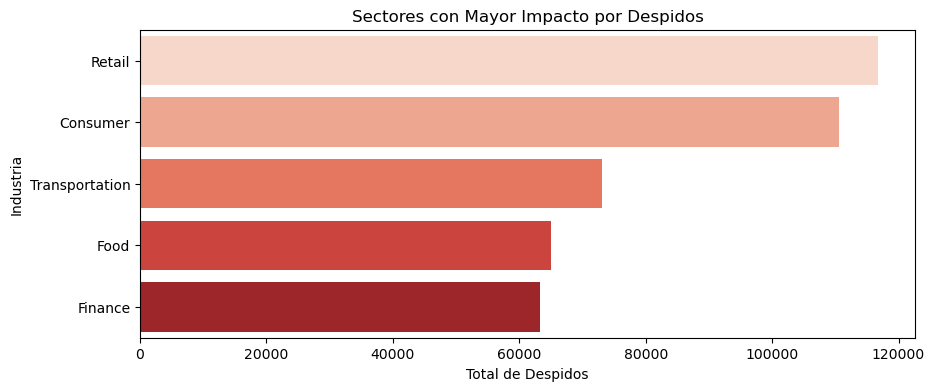

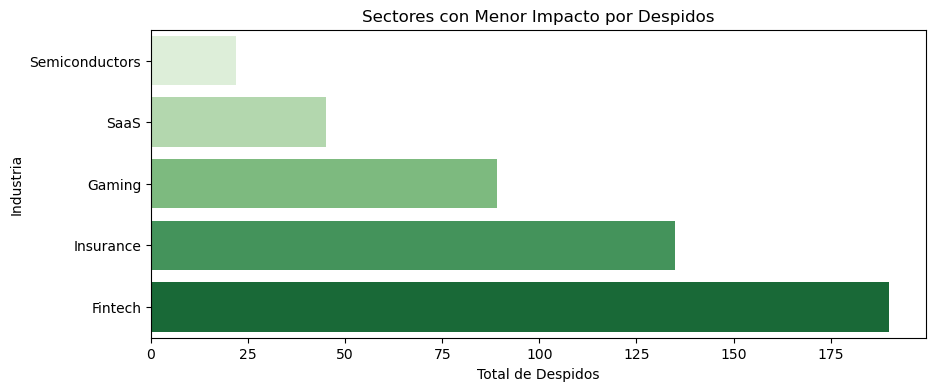

In [19]:
# Cargar las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Agrupar por industria y calcular estadísticas clave
sector_summary = df.groupby('Industry').agg(
    total_despidos=('Laid_Off', 'sum'),
    porcentaje_medio=('Percentage', 'mean')
).reset_index()


# Filtrar para eliminar el sector "Other"
sector_summary = sector_summary[sector_summary['Industry'] != 'Other']

# Identificar sectores más afectados y más resistentes
sectores_mas_afectados = sector_summary.nlargest(5, 'total_despidos')
sectores_mas_resistentes = sector_summary.nsmallest(5, 'total_despidos')

# Visualización de los resultados

# Sectores más afectados
plt.figure(figsize=(10, 4))
sns.barplot(data=sectores_mas_afectados, x='total_despidos', y='Industry', hue='Industry', dodge=False, palette='Reds', legend=False)
plt.title('Sectores con Mayor Impacto por Despidos')
plt.xlabel('Total de Despidos')
plt.ylabel('Industria')
plt.legend([],[], frameon=False)  # Elimina leyendas redundantes
plt.show()

# Sectores más resistentes
plt.figure(figsize=(10, 4))
sns.barplot(data=sectores_mas_resistentes, x='total_despidos', y='Industry', hue='Industry', dodge=False, palette='Greens', legend=False)
plt.title('Sectores con Menor Impacto por Despidos')
plt.xlabel('Total de Despidos')
plt.ylabel('Industria')
plt.legend([],[], frameon=False)  # Elimina leyendas redundantes
plt.show()


#### Sectores con mayor impacto
Los sectores más afectados por los despidos debido a la implementación de la IA, según el gráfico, son:
- **Retail**: La automatización de procesos en tiendas físicas y la optimización de cadenas de suministro han llevado a una reducción significativa de la fuerza laboral.
- **Consumer**: Este sector enfrenta una transformación hacia modelos de negocio basados en datos y servicios automatizados.
- **Transportation**: El desarrollo de vehículos autónomos y sistemas de logística inteligente ha reducido la necesidad de trabajadores humanos.
- **Food**: Las cocinas automatizadas y sistemas de gestión digital han impactado en el empleo tradicional en restaurantes y producción alimentaria.
- **Finance**: Este sector, tradicionalmente intensivo en datos, ha adoptado soluciones de IA como chatbots, análisis predictivo y detección de fraudes. Esto ha llevado a una reducción de trabajos en roles más básicos.

#### Sectores con menor impacto
- **Semiconductor**: Este sector es un motor clave para la IA, ya que fabrica componentes esenciales. Su bajo nivel de despidos podría explicarse por la alta demanda de talento técnico especializado.
- **SaaS (Software as a Service)**: Este modelo empresarial es parte del ecosistema de la IA, por lo que enfrenta un menor impacto negativo en su fuerza laboral.
- **Gaming**: Aunque la IA juega un papel importante en la creación de videojuegos, el impacto en términos de despidos parece limitado, ya que se requieren equipos creativos y técnicos especializados.
- **Insurance**: La IA ayuda a optimizar procesos, pero no ha sustituido completamente la toma de decisiones humanas en sectores críticos.
- **Fintech**: Este sector está más enfocado en el uso de la IA para innovación que en la reducción de la fuerza laboral.

#### Reflexión y proyección futura
- **Adopción tecnológica**: Los sectores con mayor impacto tienden a estar asociados con tareas repetitivas y automatizables, mientras que los sectores menos afectados requieren habilidades técnicas y especializadas que la IA no puede replicar fácilmente.
- **Evolución del impacto**: A medida que la tecnología avanza, los sectores actualmente resilientes podrían experimentar cambios significativos, especialmente si las capacidades de la IA continúan expandiéndose.
- **Implicaciones sociales y económicas**: Los despidos masivos en ciertos sectores resaltan la necesidad de programas de reconversión laboral y de un enfoque ético en la implementación de IA.

C:\Users\flore\AppData\Local\Temp\ipykernel_10116\3099223870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pais, x='Laid_Off', y='Country', palette='viridis')


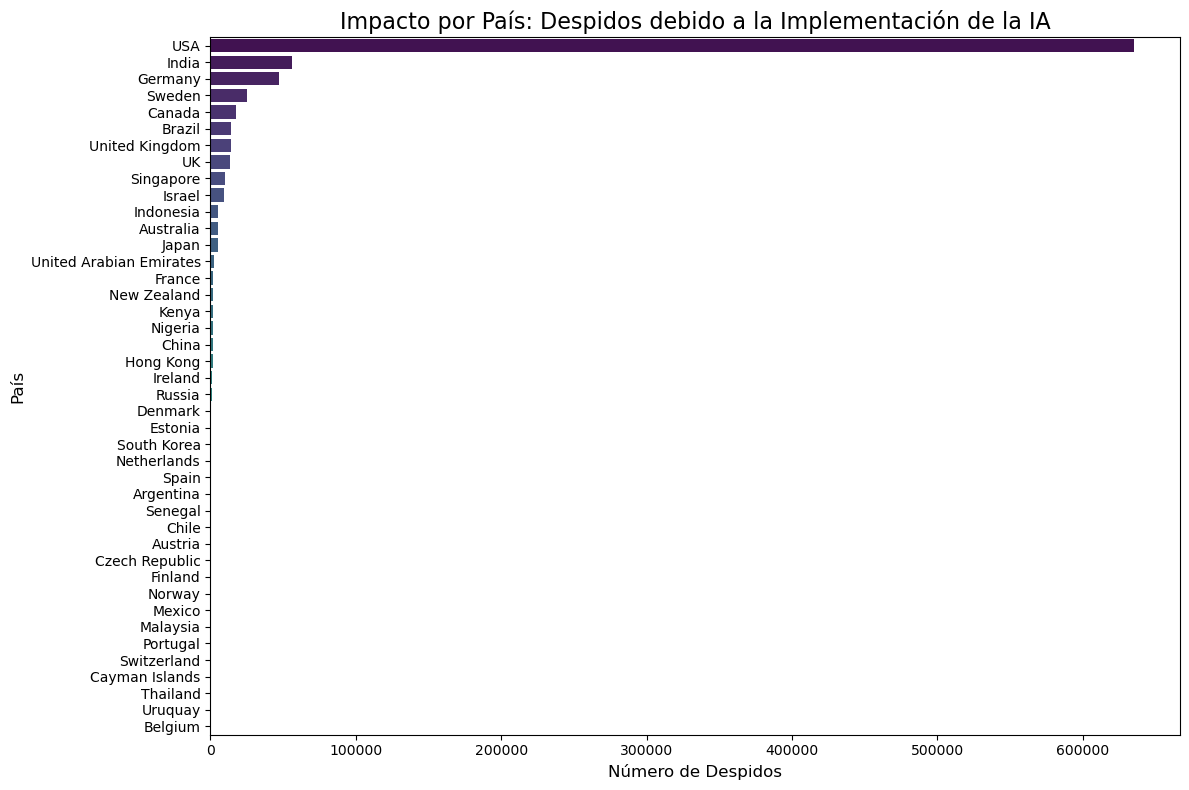

In [8]:
# Agrupar los datos por país y contar los despidos
df_pais = df.groupby('Country')['Laid_Off'].sum().reset_index()

# Ordenar por la cantidad de despidos de manera descendente
df_pais = df_pais.sort_values(by='Laid_Off', ascending=False)

# Graficar los países con mayor impacto por despidos
plt.figure(figsize=(12, 8))
sns.barplot(data=df_pais, x='Laid_Off', y='Country', palette='viridis')

# Personalizar el gráfico
plt.title('Impacto por País: Despidos debido a la Implementación de la IA', fontsize=16)
plt.xlabel('Número de Despidos', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()

# Mostrar gráfico
plt.show()


C:\Users\flore\AppData\Local\Temp\ipykernel_10116\1401471365.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_despidos.sort_values('Proporcion_Despidos', ascending=False),


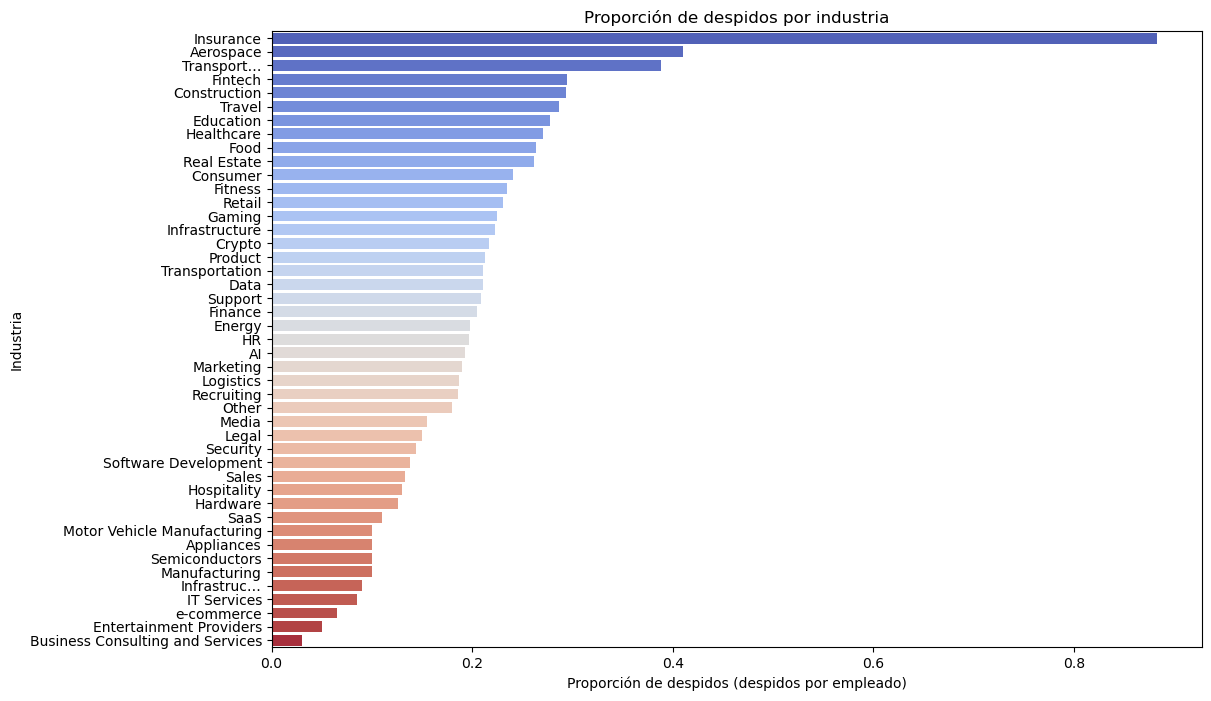

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Limpieza de la columna Percentage, convertir a float si es necesario
df['Company_Size_before_Layoffs'] = df['Company_Size_before_Layoffs'].astype(float)

# Crear la columna de proporción de despidos
df['Proporcion_Despidos'] = df['Laid_Off'] / df['Company_Size_before_Layoffs']

# Filtrar las columnas relevantes para el análisis
df_relevant = df[['Industry', 'Laid_Off', 'Company_Size_before_Layoffs', 'Proporcion_Despidos']]

# Agrupar por industria y calcular la proporción media de despidos
industry_despidos = df_relevant.groupby('Industry').agg({'Proporcion_Despidos': 'mean'}).reset_index()

# Graficar la proporción de despidos por industria
plt.figure(figsize=(12, 8))
sns.barplot(data=industry_despidos.sort_values('Proporcion_Despidos', ascending=False), 
            x='Proporcion_Despidos', y='Industry', palette='coolwarm')
plt.title("Proporción de despidos por industria")
plt.xlabel("Proporción de despidos (despidos por empleado)")
plt.ylabel("Industria")
plt.show()
